# Resources
- [Kaggel](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering)
- [Kaggel](https://www.kaggle.com/code/listonlt/mall-customers-segmentation-k-means-clustering)
- [Medium](https://medium.com/analytics-vidhya/clustering-analysis-of-mall-customer-bd785577f1b0)

In [107]:
# This is mall customer segmentation using KMeans clustering algorithm
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

In [108]:
# Importing the dataset
df = pd.read_csv('../data/mall_customers.csv')

# Exploratory Data Analysis
print("The head of the data: ")
df.head()

# Checking the data types
print("\nThe tail of the data: ")
df.info()

# Descriptive statistics
print("\nThe description of the data: ")
df.describe()

# Checking for missing values
print("\nThe missing values of the data: ")
df.isnull().sum()

# Shape of the data
print("The shape of the data: ", df.shape)

The head of the data: 

The tail of the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

The description of the data: 

The missing values of the data: 
The shape of the data:  (200, 5)


/tmp/ipykernel_13842/1429170058.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Age", y="Spending_Score", data=df, palette="coolwarm")


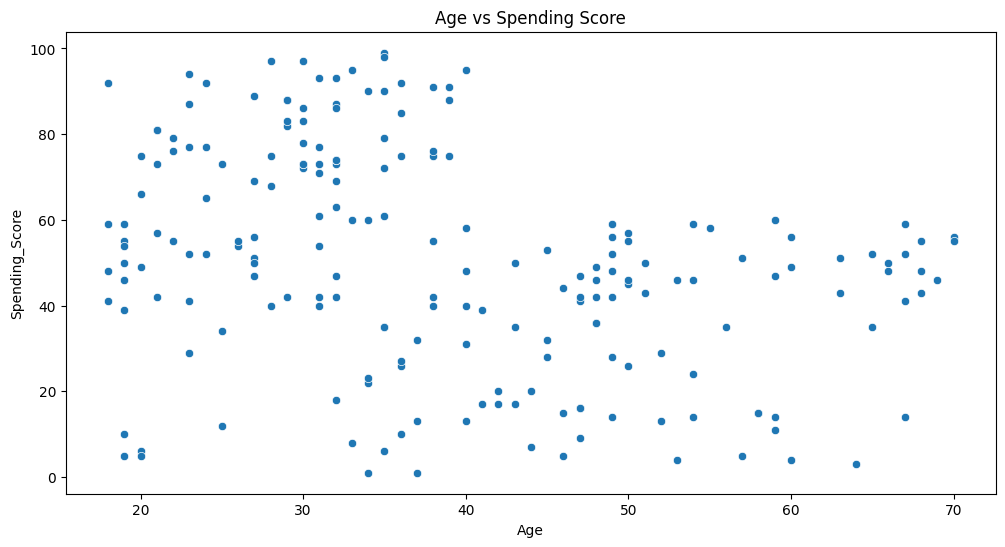

In [109]:
# plot age vs spending score
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="Spending_Score", data=df, palette="coolwarm")
plt.title("Age vs Spending Score")
plt.show()

/tmp/ipykernel_13842/1380473592.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Age", y="Annual_Income_(k$)", data=df, palette="coolwarm")


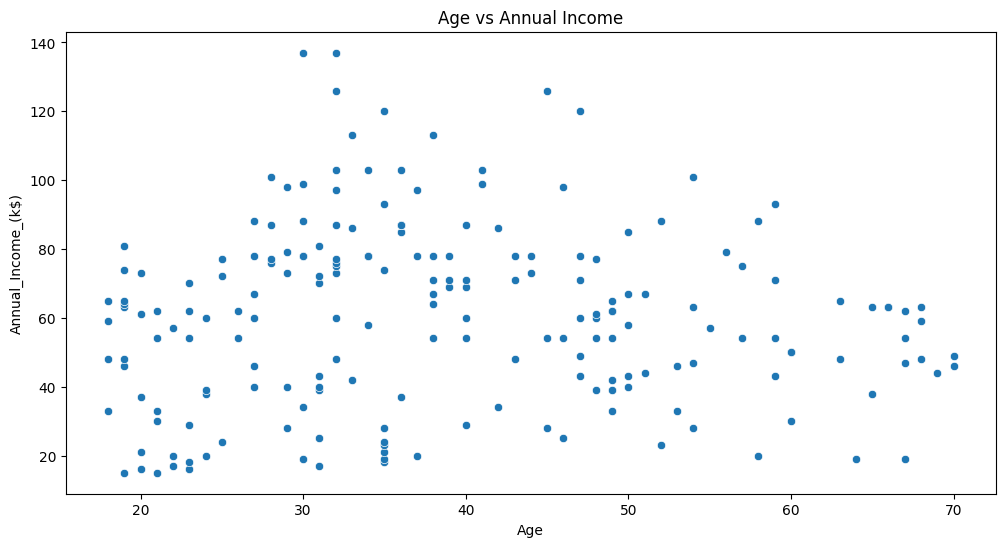

In [110]:
# age vs income
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="Annual_Income_(k$)", data=df, palette="coolwarm")
plt.title("Age vs Annual Income")
plt.show()

In [111]:
# Age vs Annual_Income_(k$) Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

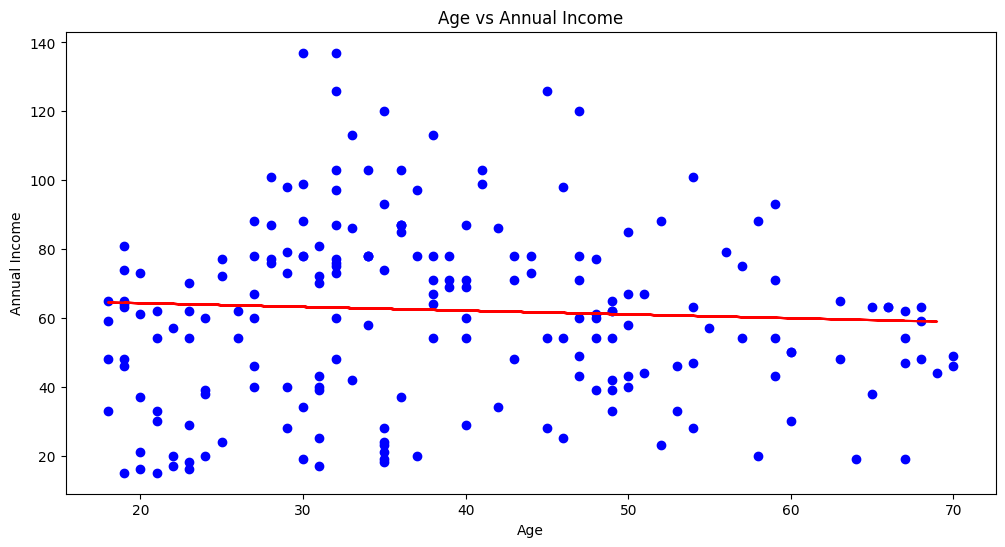

In [112]:
# Splitting the data into independent and dependent variables
X = df["Age"].values.reshape(-1, 1) # independent variable
y = df["Annual_Income_(k$)"].values.reshape(-1, 1) # dependent variable

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Creating the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


# Plotting the regression line
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color="blue")
plt.plot(X_test, y_pred, color="red")
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

In [113]:
# Checking the mean squared error
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

# RMSE 
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# accuracy of the model
print("Accuracy of the model: ", model.score(X_test, y_test))

Mean Squared Error:  926.4534619600078
Root Mean Squared Error:  30.437698039766538
Accuracy of the model:  -0.09740193412445342


Epoch 1/10


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4289.7891  
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4430.9131 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4229.4458 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4247.7500 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4314.6060 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4389.3174 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4262.4312 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4499.6421 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4247.0664 
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4314.6387 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error:  3852.535016894547
Root Mean Squared Error:  62.06879261669705
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3863.7622
Accuracy of the model:  3852.53466796875


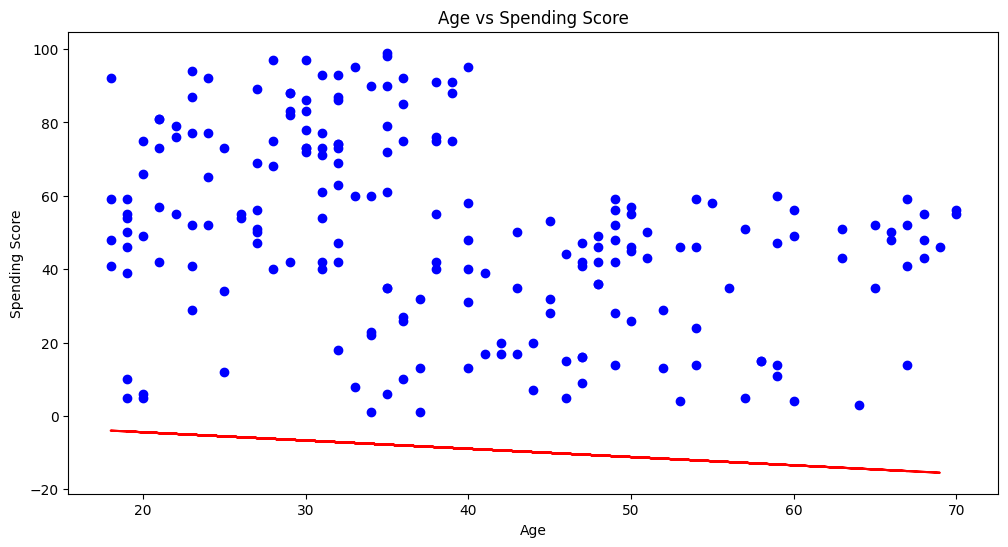

In [114]:
# Age vs Spending_Score prediction using Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Splitting the data into independent and dependent variables
X = df["Age"].values.reshape(-1, 1) # independent variable

y = df["Spending_Score"].values.reshape(-1, 1) # dependent variable

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Creating the model
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer="adam", loss="mean_squared_error")

# Training the model
model.fit(X_train, y_train, epochs=10)

# Making predictions
y_pred = model.predict(X_test)

# Plotting the regression line
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color="blue")
plt.plot(X_test, y_pred, color="red")
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")

# Checking the mean squared error
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

# RMSE
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# accuracy of the model
print("Accuracy of the model: ", model.evaluate(X_test, y_test))

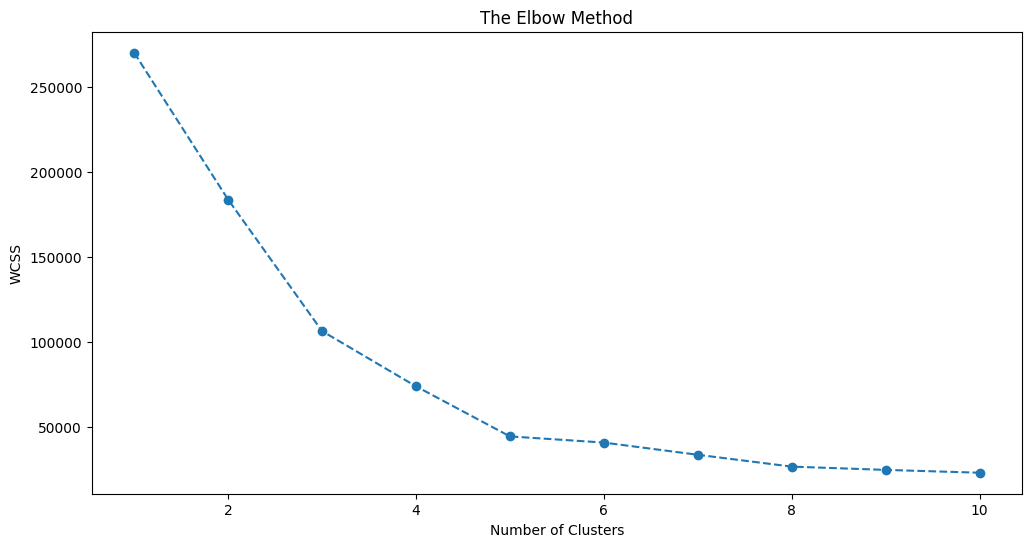

In [115]:
# liner model can't predict the spending score accurately
# KMeans Clustering
from sklearn.cluster import KMeans

# Splitting the data into independent variables
X = df.iloc[:, [3, 4]].values

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

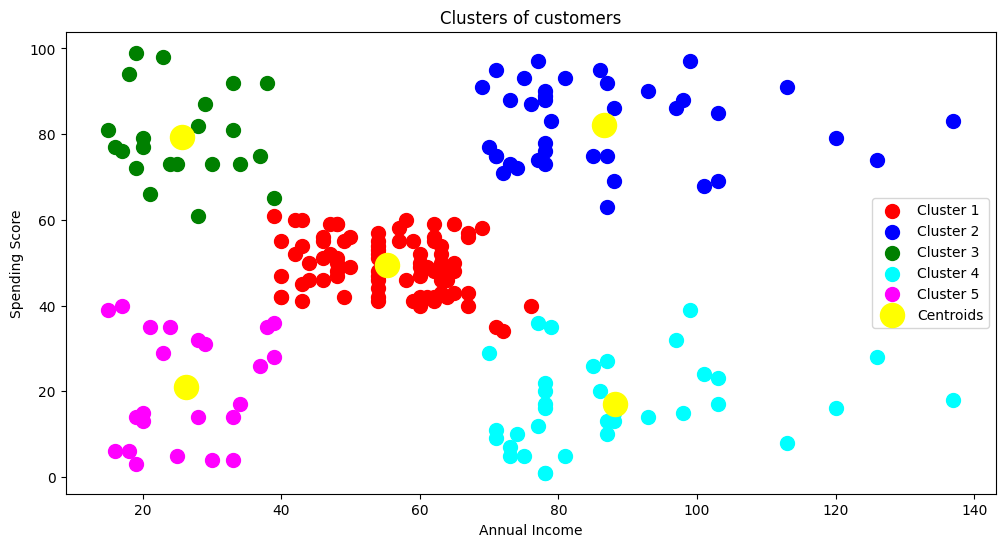

Score of the model:  -44448.45544793371


In [116]:
# Training the KMeans model on the dataset
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(12, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c="green", label="Cluster 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c="magenta", label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="Centroids")
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# Score of the model
print("Score of the model: ", kmeans.score(X))

/tmp/ipykernel_13842/438485003.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Age", y="Spending_Score", data=df, palette="coolwarm")


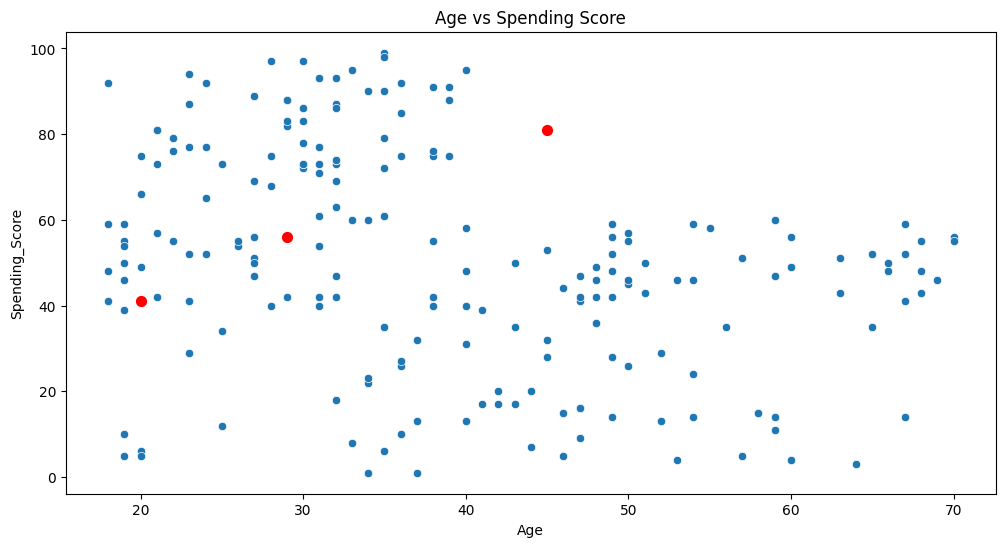

The centroid values:  [(20, 41), (29, 56), (45, 81)]


In [117]:
# create centroids
nC = 3
centroids = list(
    sorted(
        zip(
            random.sample(range(min(df['Age']), max(df['Age']+1)), nC),
            random.sample(range(min(df['Spending_Score']), max(df['Spending_Score']+1)), nC)
        )
    )
)

# plot age vs spending score
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="Spending_Score", data=df, palette="coolwarm")
plt.title("Age vs Spending Score")
plt.scatter(*zip(*centroids), color='red', s=50)
plt.show()

# Centroid values
print("The centroid values: ", centroids)

In [118]:
# calculate the distance between two points
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


# calculate the distance between two points
df['D1'] = euclidean_distance(df['Age'], df['Spending_Score'], centroids[0][0], centroids[0][1])
df['D2'] = euclidean_distance(df['Age'], df['Spending_Score'], centroids[1][0], centroids[1][1])
df['D3'] = euclidean_distance(df['Age'], df['Spending_Score'], centroids[2][0], centroids[2][1])

print("The head of the data: ")
df.head()

The head of the data: 


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,D1,D2,D3
0,1,Male,19,15,39,2.236068,19.723083,49.396356
1,2,Male,21,15,81,40.012498,26.248809,24.000000
2,3,Female,20,16,6,35.000000,50.803543,79.056942
3,4,Female,23,16,77,36.124784,21.840330,22.360680
4,5,Female,31,17,40,11.045361,16.124515,43.324358


In [119]:
# find the minimum distance
df['Cluster'] = df[['D1', 'D2', 'D3']].idxmin(axis=1) # find the minimum distance

df['Cluster'] = df['Cluster'].apply(lambda x: int(x[1])) # get the cluster number
print("The head of the data: ")
df.head()

The head of the data: 


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,D1,D2,D3,Cluster
0,1,Male,19,15,39,2.236068,19.723083,49.396356,1
1,2,Male,21,15,81,40.012498,26.248809,24.000000,3
2,3,Female,20,16,6,35.000000,50.803543,79.056942,1
3,4,Female,23,16,77,36.124784,21.840330,22.360680,2
4,5,Female,31,17,40,11.045361,16.124515,43.324358,1
